<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/Regression_Clustering(Life_Expectancy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('/content/Life_Expectancy_Data.csv')

In [ ]:
df.head()

,Country,Life expectancy,Adult Mortality per 1000,infant deaths per 1000,under-five deaths per 1000,Polio per 1000,Diphtheria per 1000,HIV/AIDS per 1000
0,c1,65.0,263,62,83,6,65,0.1
1,c2,77.8,74,0,0,99,99,0.1
2,c3,75.6,19,21,24,95,95,0.1
3,c4,52.4,335,66,98,7,64,1.9
4,c5,76.4,13,0,0,86,99,0.2


In [ ]:
df.shape

(183, 8)

In [ ]:
df.columns

Index(['Country', 'Life expectancy ', 'Adult Mortality per 1000',
       'infant deaths per 1000', 'under-five deaths per 1000',
       'Polio per 1000', 'Diphtheria per 1000', ' HIV/AIDS per 1000'],
      dtype='object')

In [ ]:
for i in ["Life expectancy "]:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.shape

(183, 8)

In [ ]:
df= df.drop_duplicates(subset=['Country'])

In [ ]:
df = df.dropna(subset=['Country'])

In [ ]:
df.isnull().sum()

,0
Country,0
Life expectancy,0
Adult Mortality per 1000,0
infant deaths per 1000,0
under-five deaths per 1000,0
Polio per 1000,0
Diphtheria per 1000,0
HIV/AIDS per 1000,0


In [ ]:
df.dtypes

,0
Country,object
Life expectancy,float64
Adult Mortality per 1000,int64
infant deaths per 1000,int64
under-five deaths per 1000,int64
Polio per 1000,int64
Diphtheria per 1000,int64
HIV/AIDS per 1000,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to scale
columns_to_scale = ['Life expectancy ', 'Adult Mortality per 1000',
       'infant deaths per 1000', 'under-five deaths per 1000',
       'Polio per 1000', 'Diphtheria per 1000', ' HIV/AIDS per 1000']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
import joblib

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select only numerical features for clustering
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# k-means clustering
model = KMeans(n_clusters=3)

# model fit using only numerical features
model.fit(numerical_df)

k_labels = model.labels_
k_centroid = model.cluster_centers_

# silhouette
print(f"Number of Clusters: {3}, Silhouette Score: {silhouette_score(numerical_df, k_labels)}")

Number of Clusters: 3, Silhouette Score: 0.5125371809140148


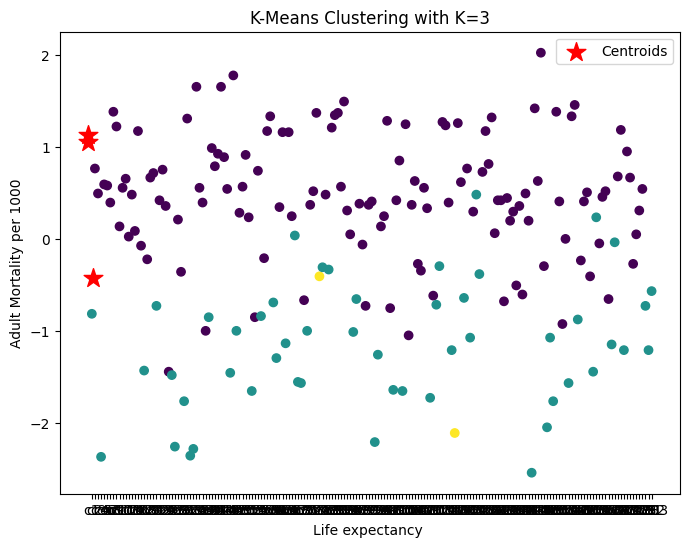

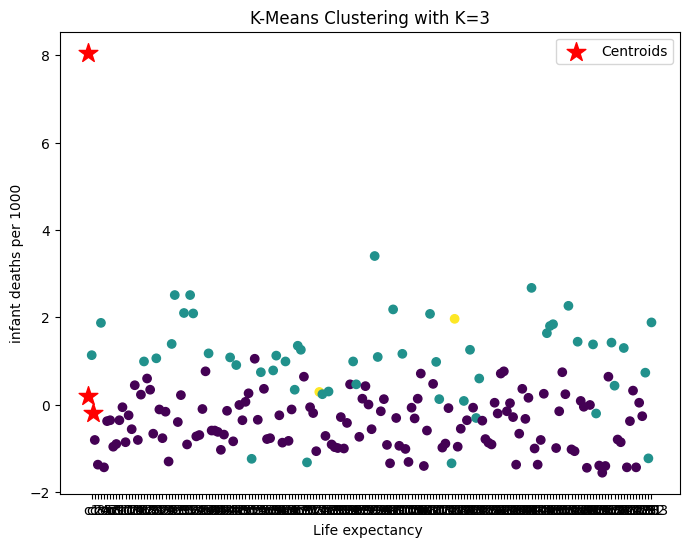

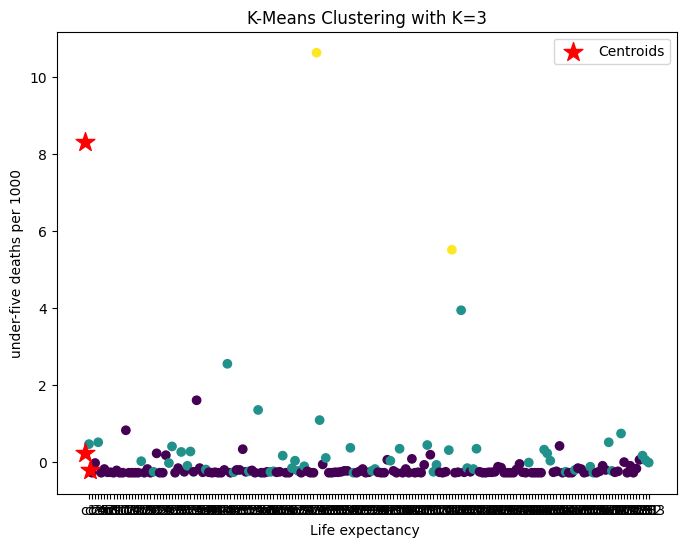

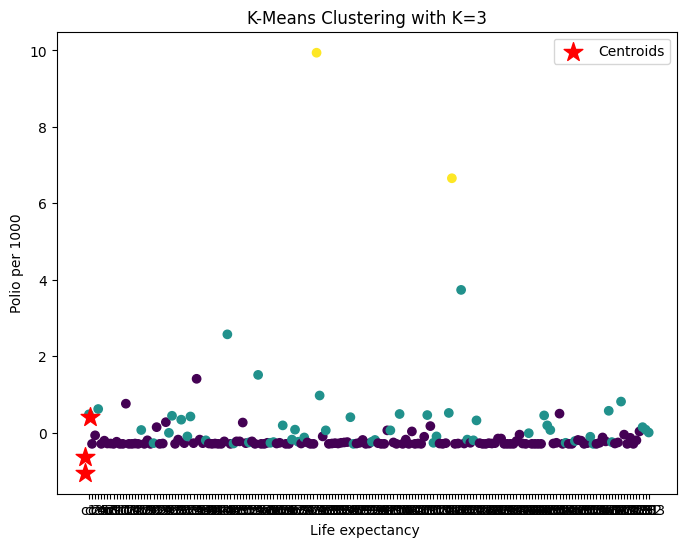

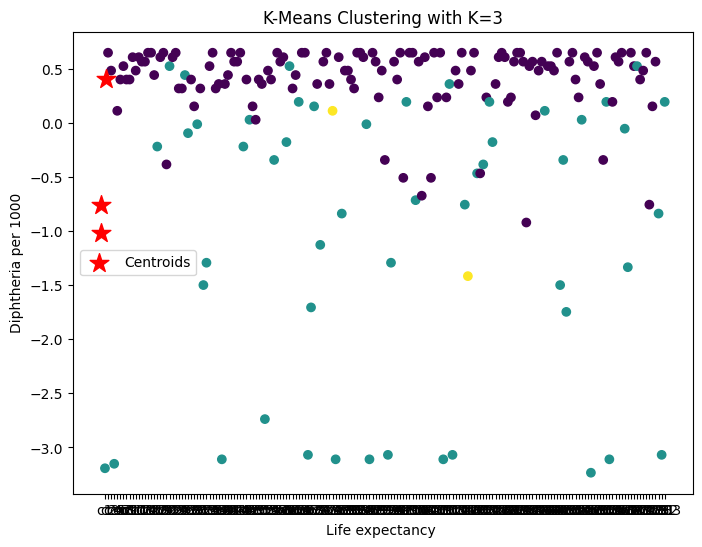

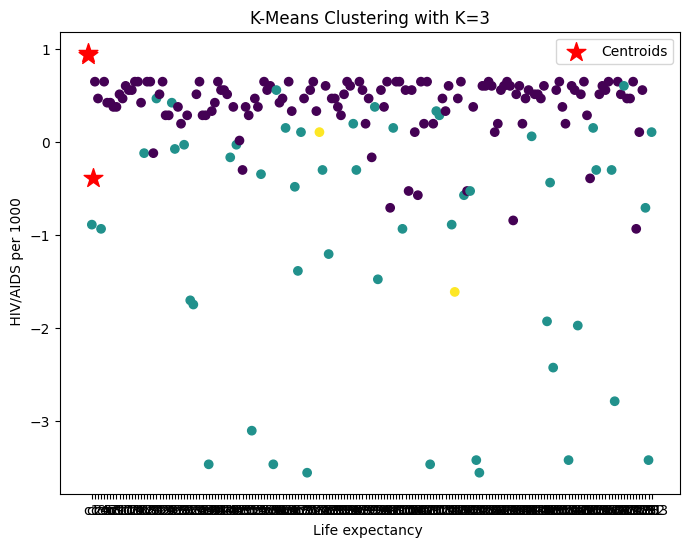

In [ ]:
import matplotlib.pyplot as plt

# Assuming x and k_labels are defined from your previous code

columns = ['Life expectancy ', 'Adult Mortality per 1000', 'infant deaths per 1000', 'under-five deaths per 1000', 'Polio per 1000', 'Diphtheria per 1000', ' HIV/AIDS per 1000']

#Change the range of the loop to avoid accessing out-of-bound indices
for i in range(len(columns) -1 ):  # Subtract 1 to stay within valid column indices
    plt.figure(figsize=(8, 6))
    # Use .iloc for integer-location based indexing to access the columns
    plt.scatter(df.iloc[:, 0], df.iloc[:, i + 1], c=k_labels, cmap='viridis')  # Life expectancy on x-axis, other columns on y-axis
    plt.scatter(k_centroid[:, 0], k_centroid[:, i + 1], marker='*', s=200, c='red', label='Centroids')
    plt.title(f'K-Means Clustering with K=3')
    plt.xlabel('Life expectancy ')
    plt.ylabel(columns[i + 1])
    plt.legend()
    plt.show()